In [0]:
%reload_ext autoreload
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

In [8]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
root_dir='/content/gdrive/My Drive'

In [0]:
!unzip -q "/content/gdrive/My Drive/fruits.zip"

In [0]:
path = Path("/content/fruits-360_dataset/fruits-360")
train_set = Path("/content/fruits-360_dataset/fruits-360/Training")
test_set = Path("/content/fruits-360_dataset/fruits-360/Test")

In [0]:
dataset = (ImageList.from_folder(path)
                                .split_by_rand_pct(0.2)
                                .label_from_folder()
                                .transform(get_transforms(), size=256)
                                .add_test_folder(test_set)).databunch(bs=32).normalize(imagenet_stats)

In [13]:
print(len(dataset.classes))

121


In [14]:
dataset.classes

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Dates',
 'Eggplant',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'Mandarine',
 'Mango',
 'Mango Red',
 'Mangostan',
 'Maracuja',
 'Melon

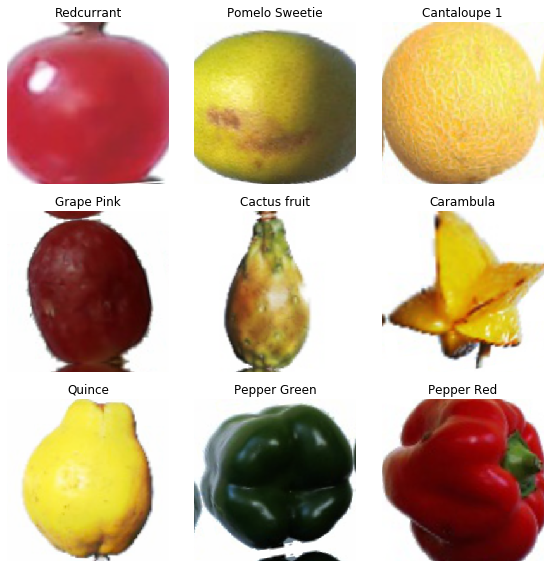

In [42]:
dataset.show_batch(rows=3, figsize=(8,8))

In [16]:
learner = cnn_learner(dataset, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 147MB/s]


In [17]:
learner.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.112815,0.006867,0.998030,13:36
1,0.029574,0.000711,0.999877,13:37
2,0.011921,0.000051,1.000000,13:41


In [0]:
learner.save('stage-1')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


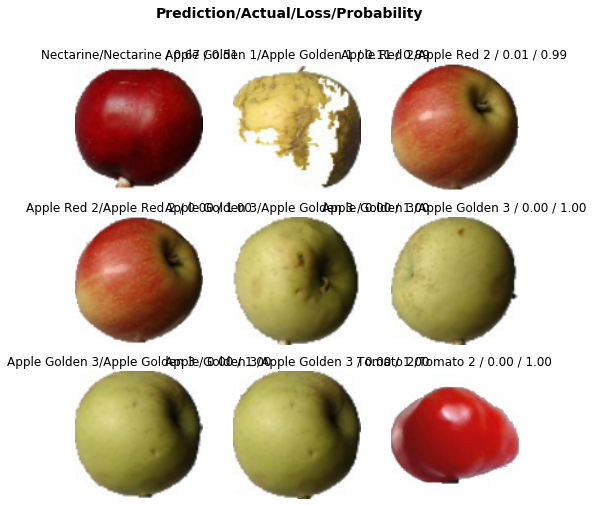

In [19]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_top_losses(9,figsize=(8,8))

In [20]:
interp.most_confused(min_val=1)

[]

In [0]:
learner.export()

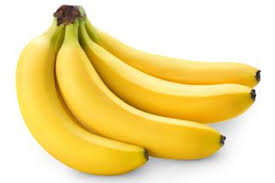

In [35]:
img = open_image('banana.jpeg')
img

In [36]:
learn = load_learner(path)
pred_class,pred_index,outputs = learn.predict(img)
pred_class

Category Banana Lady Finger

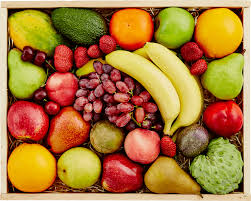

In [38]:
img = open_image('mixed_fruits.jpeg')
img

In [39]:
learn = load_learner(path)
pred_class,pred_index,outputs = learn.predict(img)
pred_class

Category test-multiple_fruits